# **BERT**

><img src="https://towardsml.files.wordpress.com/2019/09/bert.png?w=810&h=580&crop=1">


BERT, short for Bidirectional Encoder Representations from Transformers, was introduced by Google researchers in 2018. Built on the Transformer architecture, BERT is a deep learning model where every output element is interconnected with every input element. The connections between these elements are dynamically calculated based on their relationships.

BERT is specifically designed to pre-train deep bidirectional representations from unlabeled text data, considering both left and right contexts simultaneously during training.

This approach allows the pre-trained BERT model to be fine-tuned with minimal additional layers to achieve state-of-the-art performance across various natural language processing (NLP) tasks.

**Why do we need BERT?**

* Accurate language representation plays a crucial role in enhancing machine comprehension of natural language. Context-free models like word2vec or GloVe generate a single word embedding for each word in their vocabulary, regardless of context. For instance, the word "bank" would have the same representation in both "bank deposit" and "riverbank". In contrast, contextual models such as BERT generate word representations that vary based on the surrounding words in a sentence, capturing these relationships bidirectionally.


* BERT builds upon recent advancements in pre-training contextual representations, drawing inspiration from models like Semi-supervised Sequence Learning, Generative Pre-Training, ELMo, the OpenAI Transformer, and ULMFit. Unlike its predecessors, which are typically unidirectional or shallowly bidirectional, BERT is fully bidirectional.


* One of BERT's standout features is its accessibility; it is freely available for download. This allows users to leverage BERT models to extract high-quality language features from text data. Moreover, these models can be fine-tuned on specific tasks such as sentiment analysis or question answering using proprietary data, enabling the generation of cutting-edge predictions tailored to specific applications.










### **What is the core idea behind it?**

Language modeling revolves around predicting and generating coherent sequences of words based on contextual cues. The primary objective of language models is to understand and predict the most likely words or sequences of words that would logically follow a given context. For instance, given the prompt

"The woman went to the store and bought a _____ of shoes,"

a traditional language model (using a one-directional approach) might predict that the word "cart" fills the blank 20% of the time and "pair" 80% of the time, based on its training data.

BERT (Bidirectional Encoder Representations from Transformers) represents a significant advancement in language modeling by introducing bidirectional training. Unlike earlier models that process text in a single direction, BERT considers both preceding and succeeding tokens simultaneously. This bidirectional approach allows BERT to capture a richer context and deeper understanding of language semantics and flow. It achieves this using the Transformer model architecture, which contrasts with the sequential nature of models like LSTMs commonly used in previous language models. This bidirectional capability enhances BERT's ability to handle complex linguistic tasks such as understanding nuances in language and generating more accurate predictions based on broader context.


### **Architecture of BERT**

There are four types of pre-trained versions of BERT depending on the scale of the model architecture:

* BERT-Base (Cased / Un-Cased): 12-layer, 768-hidden-nodes, 12-attention-heads, 110M parameters
* BERT-Large (Cased / Un-Cased): 24-layer, 1024-hidden-nodes, 16-attention-heads, 340M parameters

><img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/09/bert_encoder.png">


### **How does it work?**

Let's Dive into it

**Text - Preprocessing**
BERT utilizes a Transformer architecture, which employs an attention mechanism to learn contextual dependencies between words within a text. The Transformer model consists of two main components: an encoder, responsible for processing input text, and a decoder, used for generating predictions in tasks like machine translation. However, since BERT focuses solely on language representation modeling, it exclusively utilizes the encoder component.

In BERT, the input to the encoder consists of a sequence of tokens, each initially transformed into vectors and then processed within the neural network. Specifically, each input embedding in BERT is composed of three primary embeddings:

><img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*sqwdLJj2HlRPkkOmyrKbtw.png">

The input representation for BERT: The input embeddings are the sum of the token embeddings, the segmentation embeddings and the position embeddings.

* Token embeddings: A [CLS] token is added to the input word tokens at the beginning of the first sentence and a [SEP] token is inserted at the end of each sentence.
* Segment embeddings:A marker indicating Sentence A or Sentence B is added to each token. This allows the encoder to distinguish between sentences.
* Positional embeddings:A positional embedding is added to each token to indicate its position in the sentence.


**Pre-training Tasks**

BERT is pre-trained on two NLP tasks:

**Masked Language Modelling**

* Masked Language Modeling (MLM) involves a different approach from traditional Language Modeling, where instead of predicting every subsequent token in a sequence, a portion of the input tokens is randomly masked, and the model is trained to predict these masked tokens. The [MASK] token serves to denote that a token in the input has been masked.

* To prevent the model from always predicting [MASK] during fine-tuning, 15% of the tokens in the input sequence are chosen randomly for masking.

Among these masked tokens:

* 80% of the time, the tokens are replaced with the [MASK] token itself.

* 10% of the time, the tokens are replaced with a randomly selected token.

* 10% of the time, the tokens are left unchanged.

This method allows the model to learn to predict missing tokens while also ensuring robustness and adaptability across different tasks and datasets during training and fine-tuning phases.

**Next Sentence Prediction**

* Next sentence prediction task is a binary classification task in which, given a pair of sentences, it is predicted if the second sentence is the actual next sentence of the first sentence.

><img src="https://yashuseth.files.wordpress.com/2019/06/fig5.png?w=442&h=231">

* This task can be easily generated from any monolingual corpus. It is helpful because many downstream tasks such as Question and Answering and Natural Language Inference require an understanding of the relationship between two sentences.

Now, **Implementation of BERT**

**Problem Statement:**
We have a collection of SMS messages. Some of these messages are spam and the rest are genuine. Our task is to build a system that would automatically detect whether a message is spam or not.



Import Required Libraries & Dataset

In [20]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

# specify GPU/CPU
device = torch.device("cuda")

**Dataset:**

The dataset consists of two columns – “label” and “text”. The column “text” contains the message body and the “label” is a binary variable where 1 means spam and 0 means the message is not a spam.

In [21]:
df = pd.read_csv("/content/spamdata_v2.csv")
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
# check class distribution
df['label'].value_counts(normalize = True)

label
0    0.865937
1    0.134063
Name: proportion, dtype: float64

Split the Dataset into train / test

In [23]:
# split train dataset into train, validation and test sets
train_text, temp_text, train_labels, temp_labels = train_test_split(df['text'], df['label'],
                                                                    random_state=2018,
                                                                    test_size=0.3,
                                                                    stratify=df['label'])


val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                                                                random_state=2018,
                                                                test_size=0.5,
                                                                stratify=temp_labels)

Import Bert - base- uncased

In [24]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

<Axes: >

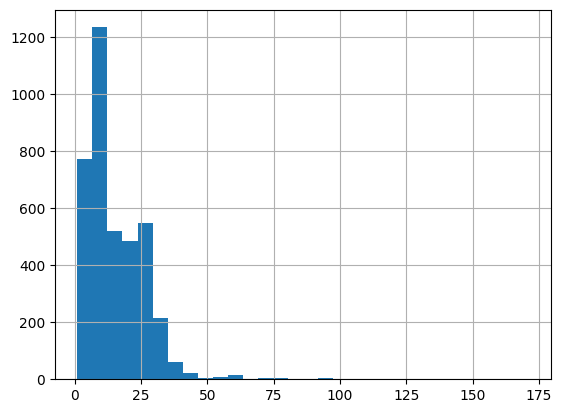

In [25]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 30)

**Tokenize & Encode the Sequences**

Which Tokenization strategy is used by BERT?

BERT employs WordPiece tokenization, which starts with a vocabulary initialized with individual characters of the language. It then iteratively adds the most frequent or likely combinations of existing words in the vocabulary.

What is the maximum sequence length of the input?

The maximum sequence length of the input for BERT is 512 tokens. This length constraint applies to the total number of tokens in both the question and the context or passage being analyzed.

In [26]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

List to Tensors

In [27]:
# convert lists to tensors

train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

Data Loader

In [28]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

Model Architecture

In [29]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

In [30]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
        super(BERT_Arch, self).__init__()

        self.bert = bert

        # dropout layer
        self.dropout = nn.Dropout(0.1)

        # relu activation function
        self.relu =  nn.ReLU()

        # dense layer 1
        self.fc1 = nn.Linear(768,512)

        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512,2)

        #softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

        #pass the inputs to the model
        _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)

        x = self.fc1(cls_hs)

        x = self.relu(x)

        x = self.dropout(x)

        # output layer
        x = self.fc2(x)

        # apply softmax activation
        x = self.softmax(x)

        return x

In [33]:
# pass the pre-trained BERT to our define architecture
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BERT_Arch(bert)

# push the model to CPU
model = model.to(device)

In [36]:
# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(),lr = 1e-5)

In [39]:
from sklearn.utils.class_weight import compute_class_weight

# Compute the class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_labels), y=train_labels)

print("Class Weights:",class_weights)

Class Weights: [0.57743559 3.72848948]


In [41]:
# converting list of class weights to a tensor
weights= torch.tensor(class_weights,dtype=torch.float)

# push to GPU/CPU
weights = weights.to(device)

# define the loss function
cross_entropy  = nn.NLLLoss(weight=weights)

# number of training epochs
epochs = 10

Fine - Tune

In [42]:
# function to train the model
def train():

    model.train()
    total_loss, total_accuracy = 0, 0

    # empty list to save model predictions
    total_preds=[]

    # iterate over batches
    for step,batch in enumerate(train_dataloader):

        # progress update after every 50 batches.
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

        # push the batch to gpu
        batch = [r.to(device) for r in batch]

        sent_id, mask, labels = batch

        # clear previously calculated gradients
        model.zero_grad()

        # get model predictions for the current batch
        preds = model(sent_id, mask)

        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)

        # add on to the total loss
        total_loss = total_loss + loss.item()

        # backward pass to calculate the gradients
        loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # update parameters
        optimizer.step()

        # model predictions are stored on GPU. So, push it to CPU
        preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

    # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)

      # predictions are in the form of (no. of batches, size of batch, no. of classes).
      # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    #returns the loss and predictions
    return avg_loss, total_preds

In [43]:
# function for evaluating the model
def evaluate():

    print("\nEvaluating...")

    # deactivate dropout layers
    model.eval()

    total_loss, total_accuracy = 0, 0

    # empty list to save the model predictions
    total_preds = []

    # iterate over batches
    for step,batch in enumerate(val_dataloader):

        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:

            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

        # push the batch to gpu
        batch = [t.to(device) for t in batch]

        sent_id, mask, labels = batch

        # deactivate autograd
        with torch.no_grad():

            # model predictions
            preds = model(sent_id, mask)

            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds,labels)

            total_loss = total_loss + loss.item()

            preds = preds.detach().cpu().numpy()

            total_preds.append(preds)

    # compute the validation loss of the epoch
    avg_loss = total_loss / len(val_dataloader)

    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds


In [44]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):

    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))

    #train model
    train_loss, _ = train()

    #evaluate model
    valid_loss, _ = evaluate()

    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')

    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')



 Epoch 1 / 10
  Batch    50  of    122.
  Batch   100  of    122.

Evaluating...

Training Loss: 0.681
Validation Loss: 0.659

 Epoch 2 / 10
  Batch    50  of    122.
  Batch   100  of    122.

Evaluating...

Training Loss: 0.647
Validation Loss: 0.628

 Epoch 3 / 10
  Batch    50  of    122.
  Batch   100  of    122.

Evaluating...

Training Loss: 0.626
Validation Loss: 0.604

 Epoch 4 / 10
  Batch    50  of    122.
  Batch   100  of    122.

Evaluating...

Training Loss: 0.599
Validation Loss: 0.576

 Epoch 5 / 10
  Batch    50  of    122.
  Batch   100  of    122.

Evaluating...

Training Loss: 0.571
Validation Loss: 0.548

 Epoch 6 / 10
  Batch    50  of    122.
  Batch   100  of    122.

Evaluating...

Training Loss: 0.551
Validation Loss: 0.526

 Epoch 7 / 10
  Batch    50  of    122.
  Batch   100  of    122.

Evaluating...

Training Loss: 0.524
Validation Loss: 0.502

 Epoch 8 / 10
  Batch    50  of    122.
  Batch   100  of    122.

Evaluating...

Training Loss: 0.509
Validat

It took 1 hr to execute the code.
The consistent decrease in both training and validation losses suggests that the model is effectively learning the patterns in the training data and generalizing well to the validation data, indicating improved performance and reduced overfitting as training.

In [45]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

Make Predictions

In [46]:
# get predictions for test data
with torch.no_grad():
    preds = model(test_seq.to(device), test_mask.to(device))
    preds = preds.detach().cpu().numpy()

In [47]:
# model's performance
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       724
           1       0.54      0.78      0.64       112

    accuracy                           0.88       836
   macro avg       0.75      0.84      0.78       836
weighted avg       0.91      0.88      0.89       836



**Inference:**

The model achieves high precision (0.96) and recall (0.90) for negative sentiment (class 0), indicating it is very effective at correctly identifying negative reviews. However, for positive sentiment (class 1), the precision is lower (0.54), suggesting that many reviews predicted as positive are actually negative. Despite this, the recall for positive sentiment is relatively high (0.78), meaning the model captures a significant portion of true positive reviews. The overall accuracy is 0.88, and the weighted average F1-score is 0.89, indicating robust overall performance, but there is room for improvement in distinguishing positive sentiment.

**End of Notebook**